## Data Replication

Gather Minecraft skins from the following site: https://www.minecraftskins.com/

In [69]:
# imports
import umap
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import numpy as np
import os
import matplotlib.pyplot as plt

from keras import backend as K
K.set_image_data_format('channels_first')

In [52]:
# download pre-trained model
model = VGG16(weights='imagenet', include_top=False, input_shape=(3, 224, 224))
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3, 224, 224)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 224, 224)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 224, 224)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 112, 112)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 112, 112)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 112, 112)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 56, 56)       0     

In [129]:
def get_feat_vectors(data_dir):
    img_cnt = len(os.listdir(data_dir))
    features = {
        'aesthetic': [],
        'blue': [],
        'cute': [],
        'girl': [],
        'no_tags': [],
        'other': [],
        'pink': []
    }
    for i in range(img_cnt):
        try:
            img_scaled = load_img(data_dir + str(i) + '.png', target_size=(224,224))
            img_arr = img_to_array(img_scaled)
            img_exp = np.expand_dims(img_arr, axis=0)
            img_preprocess = preprocess_input(img_exp)
            feat_vect = model.predict(img_preprocess)[0]
            features[skins_single_tag[skins_single_tag['img_num'] == str(i)]['class'].values[0]].append(np.array(feat_vect.flatten()))
            #features.append(np.array(feat_vect.flatten()))
        except:
            print("Error with image. Moving to next image")
        
    return features

In [128]:
skins_single_tag[skins_single_tag['img_num'] == '0']['class'].values[0]

'girl'

In [ ]:
# extract features for all skins from path
path = 'C:\\Users\\Nicho\\Desktop\\MineSkins\\data\\'
features = get_feat_vectors(path)

Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving 

Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving 

Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving to next image
Error with image. Moving 

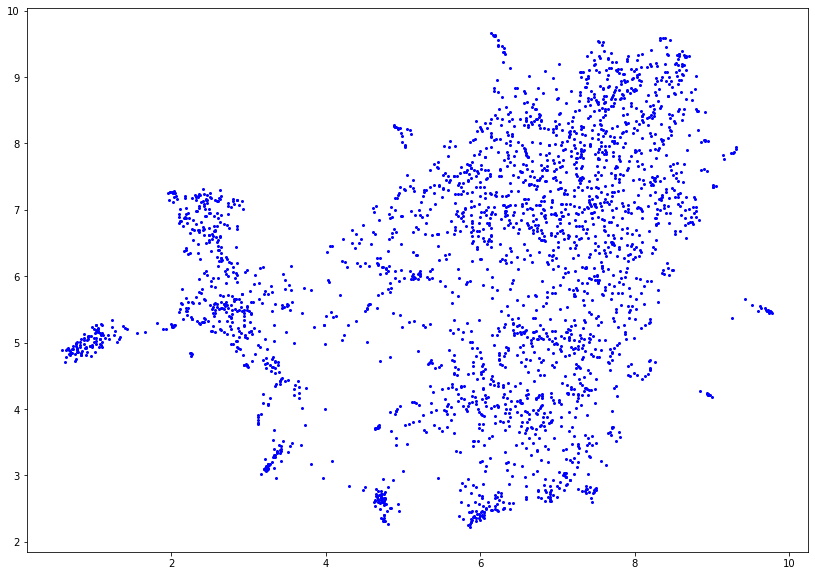

In [86]:
# default n_neighbors cluster viz
fit = umap.UMAP(n_neighbors)
reduced = fit.fit_transform(features)
plt.figure(figsize=(14, 10))
plt.scatter(reduced[:, 0], reduced[:, 1], c='blue', s=4)
plt.savefig('UMAP-all-skins.png')

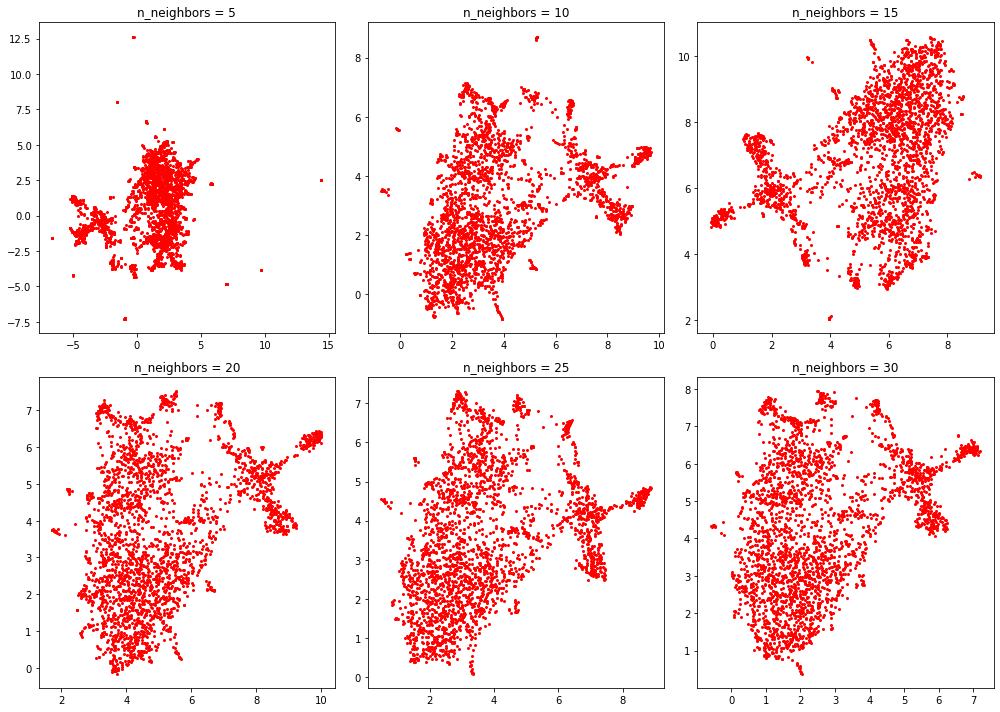

In [87]:
# reduce dimensions (tune n_neighbors)
n_neighbors = [x for x in range(5, 35, 5)]
idx = 0
fig, ax = plt.subplots(2, 3, figsize=(14, 10))
for r in range(2):
    for c in range(3):
        n = n_neighbors[idx]
        fit = umap.UMAP(n_neighbors=n)
        reduced = fit.fit_transform(features)
        ax[r][c].scatter(reduced[:, 0], reduced[:, 1], c='red', s=4)
        ax[r][c].set_title('n_neighbors = {0}'.format(n))
        idx += 1
fig.tight_layout()
plt.savefig('UMAP-all-varying-neighbors.png')

KeyboardInterrupt: 

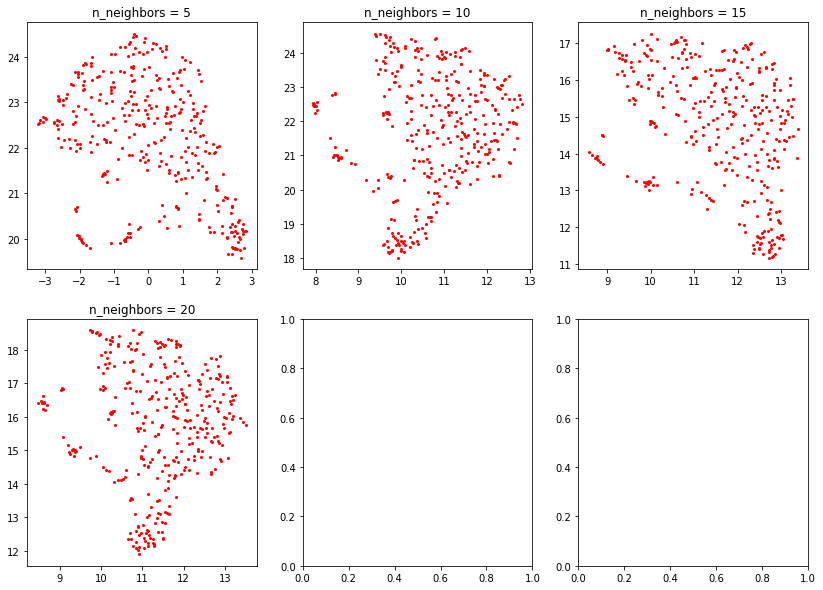

In [108]:
n_neighbors = [x for x in range(5, 35, 5)]
idx = 0
fig, ax = plt.subplots(2, 3, figsize=(14, 10))
for r in range(2):
    for c in range(3):
        n = n_neighbors[idx]
        fit = umap.UMAP(n_neighbors=50)
        reduced = fit.fit_transform(features)
        ax[r][c].scatter(reduced[:, 0], reduced[:, 1], c='red', s=4)
        ax[r][c].set_title('n_neighbors = {0}'.format(n))
        idx += 1
fig.tight_layout()
plt.savefig('UMAP-all-varying-neighbors.png')

C:\Users\Nicho\anaconda3\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\anaconda3\lib\site-packages\umap\layouts.py", line 60:

def _optimize_layout_euclidean_single_epoch(
^

  state.func_ir.loc))


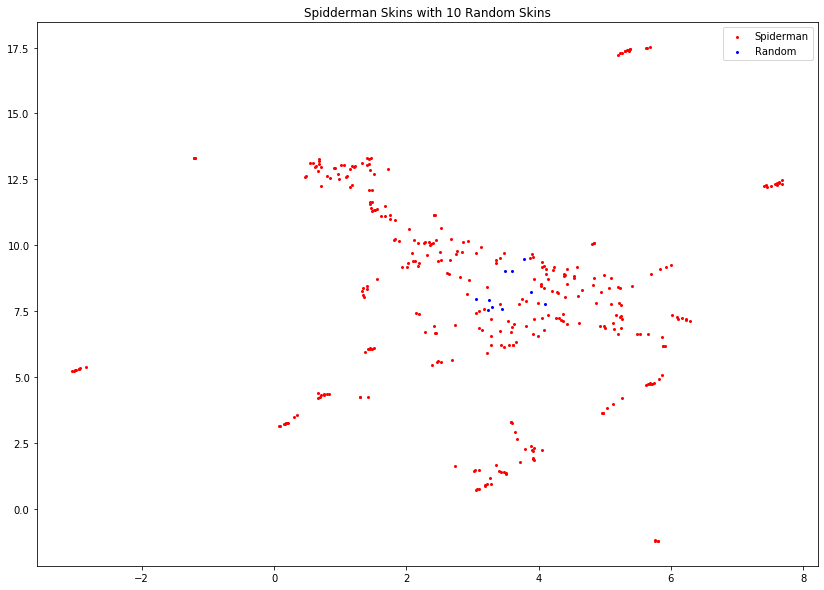

In [112]:
# spiderman skins with 10 random skins (spidey = red, random = blue)
plt.figure(figsize=(14, 10))
fit = umap.UMAP(n_neighbors=5)
reduced = fit.fit_transform(features)
plt.scatter(reduced[:-10, 0], reduced[:-10, 1], c='red', s=4, label='Spiderman')
plt.scatter(reduced[-10:, 0], reduced[-10:, 1], c='blue', s=4, label='Random')
plt.title('Spidderman Skins with 10 Random Skins')
plt.legend()
fig.tight_layout()
#plt.savefig('UMAP-all-varying-neighbors.png')

In [102]:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14][-4:]

[11, 12, 13, 14]

In [118]:
import pandas as pd

In [116]:
# plot using colored groups
fp = os.path.join('..', 'tags.txt')
with open(fp) as f:
    tags_dict = json.load(f)

# compile into raw list
tags = []
for key, item in tags_dict.items():
    if len(item) > 0:
        tags += item
        
# get counts of each tag
tag_counts_full = {
    'tag': []
    , 'cnt': []
}
for t1 in tags:
    if t1 in tag_counts_full['tag']:
        continue
    cnt = 0
    for t2 in tags:
        if t1.lower() == t2.lower():
            cnt += 1
    tag_counts_full['tag'].append(t1)
    tag_counts_full['cnt'].append(cnt)

In [119]:
tags_df = pd.DataFrame(tag_counts_full)
tags_df = tags_df.sort_values(by='cnt', ascending=False).reset_index(drop=True)
single_tags = {
    'img_num': [],
    'popular_tag': []
}
for fname, tags in tags_dict.items():
    if len(tags) == 0:
        single_tags['img_num'].append(fname)
        single_tags['popular_tag'].append('no_tags')
        continue
      
    # find most popular tag and use that
    max_tag = tags[0]
    max_val = tags_df[tags_df['tag'] == max_tag]['cnt'].values[0]
    for t in tags:
        val = tags_df[tags_df['tag'] == t]['cnt'].values[0] 
        if val > max_val:
            max_tag = t
            max_val = val
    
    # update using the best tag
    single_tags['img_num'].append(fname)
    single_tags['popular_tag'].append(max_tag)

In [120]:
# create df using single tag
skins_single_tag = pd.DataFrame(single_tags)

# assign each skin to one of the popular classes
top_classes = list(tags_df.loc[:4, 'tag'].values)
def get_class(x):
    if x in top_classes or x == 'no_tags':
        return x
    return 'other'
skins_single_tag['class'] = skins_single_tag['popular_tag'].apply(get_class)
skins_single_tag.head()

,img_num,popular_tag,class
0,0,girl,girl
1,1,pokemon,other
2,2,girl,girl
3,3,removetoxicity,other
4,4,girl,girl


In [121]:
skins_single_tag.groupby('class').count()

,img_num,popular_tag
class,,
aesthetic,51,51
blue,163,163
cute,210,210
girl,551,551
no_tags,507,507
other,1291,1291
pink,52,52


In [ ]:
colors = ['blue', 'red', 'black', 'yellow', 'green', 'teal', 'pink']
c_idx = 0
fit = umap.UMAP()
plt.figure(figsize=(14, 10))
for clss, feat in features.items():
    reduced = fit.fit_transform(feat)
    plt.scatter(reduced, label=clss, c=colors[c_idx], s=4)
    c_idx += 1
plt.title('Top 5 Skin Classes')
plt.legend()

In [42]:
import tensorflow as tf
import keras.backend.tensorflow_backend as tfback
def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

In [36]:
from skimage.color import *
import numpy as np

(array([3205.,   36.,   19.,   98.,   65.,   35.,    0.,    0.,   41.,
         597.]),
 array([0.        , 0.09939394, 0.19878788, 0.29818182, 0.39757576,
        0.4969697 , 0.59636364, 0.69575758, 0.79515152, 0.89454545,
        0.99393939]),
 <a list of 10 Patch objects>)

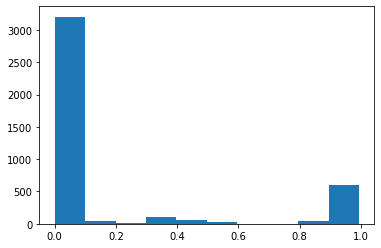

In [79]:
hsv = rgb2hsv(io.imread('../data/5.png')[:, :, :-1])
hue = hsv[:, :, 0]
plt.hist(hue.ravel())

(array([7.86754358, 0.32411616, 0.17097581, 0.04014031, 0.04739255,
        0.5611211 , 0.24830494, 0.28924638, 0.17135529, 0.29666727]),
 array([0.        , 0.09983165, 0.1996633 , 0.29949495, 0.3993266 ,
        0.49915825, 0.5989899 , 0.69882155, 0.7986532 , 0.89848485,
        0.9983165 ]),
 <a list of 10 Patch objects>)

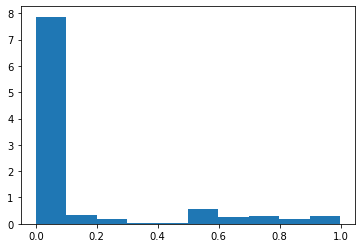

In [87]:
images = os.listdir('../data/')
vals = []
for img in images:
    hue = rgb2hsv(io.imread('../data/'+img)[:, :, :-1])[:, :, 0]
    vals += list(hue.ravel())
plt.hist(vals, density=True)

In [4]:
sample = io.imread('../data/6.png')

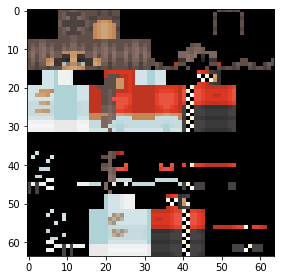

In [18]:
io.imshow(sample[:, :, :-1])

In [42]:
filtered = np.zeros((64, 64, 4))
for r in range(len(sample)):
    for c in range(len(sample[r])):
        if sample[r][c][3] == 255:
            filtered[r][c] = sample[r][c]

C:\Users\Nicho\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


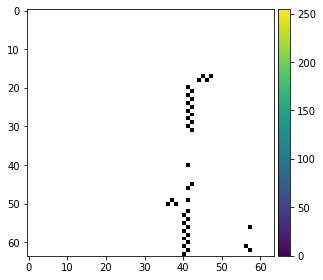

In [43]:
io.imshow(filtered)

In [33]:
filtered

[array([ 96,  79,  72, 255], dtype=uint8),
 array([ 96,  79,  72, 255], dtype=uint8),
 array([ 96,  79,  72, 255], dtype=uint8),
 array([110,  91,  83, 255], dtype=uint8),
 array([110,  91,  83, 255], dtype=uint8),
 array([ 96,  79,  72, 255], dtype=uint8),
 array([ 96,  79,  72, 255], dtype=uint8),
 array([ 96,  79,  72, 255], dtype=uint8),
 array([ 96,  79,  72, 255], dtype=uint8),
 array([ 96,  79,  72, 255], dtype=uint8),
 array([ 77,  66,  62, 255], dtype=uint8),
 array([ 96,  79,  72, 255], dtype=uint8),
 array([ 96,  79,  72, 255], dtype=uint8),
 array([ 77,  66,  62, 255], dtype=uint8),
 array([ 96,  79,  72, 255], dtype=uint8),
 array([ 96,  79,  72, 255], dtype=uint8),
 array([ 96,  79,  72, 255], dtype=uint8),
 array([ 77,  66,  62, 255], dtype=uint8),
 array([ 96,  79,  72, 255], dtype=uint8),
 array([ 96,  79,  72, 255], dtype=uint8),
 array([ 77,  66,  62, 255], dtype=uint8),
 array([ 96,  79,  72, 255], dtype=uint8),
 array([ 96,  79,  72, 255], dtype=uint8),
 array([110

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


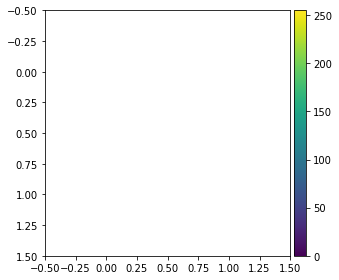

In [58]:
test = np.zeros((2, 2, 4))
test[0][0] = np.array([255, 0, 0, 0])
io.imshow(test)

In [9]:
tag_soup = BeautifulSoup(r.get('https://www.minecraftskins.com/skin/14465290/george/').text, 'html.parser')
tag_soup.find('div', {'class': 'skin-user-info'}).find_all('href')

[]